In [1]:
import pandas as pd

In [3]:
enrichmentLog = pd.read_csv('BMPMammalOnlyKeeperLog.csv')

enrichmentLog.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Feeding Log,Did you feed all individuals?,"If not, who did you feed?",What did you feed? (Weight per animal) [<0.1 lb],...,Did you sedate?,Vet Log,Type.2,Vet name,Type.3,Location,Notes.1,Reminders,Reminder Date,Reminder/Note
0,12/1/2024 10:43,Red Fox,Jake,Feeding/Observation,12/1/2024,10:30:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/1/2024 10:45,Wolf,Jake,Habitat Cleaning/Observation,12/1/2024,10:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/1/2024 10:43,Bobcat,Jake,Feeding/Observation,12/1/2024,9:00:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/30/2024 16:31,Bobcat,Jake,Feeding/Observation,11/30/2024,4:45:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/30/2024 16:32,Red Fox,Jake,Feeding/Observation,11/30/2024,4:30:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
enrichmentLog = enrichmentLog[enrichmentLog['Log Type'] == "Enrichment/Observation"]

In [7]:
habitatLog_cols = ['Timestamp','Animal','Staff','Log Type','Date','Time','Observation Type','Finding','Which individuals in habitat?','Enrichment type','Enrichment type details','Time In','Time Out','Response','Notes']

enrichmentLog_df = enrichmentLog[habitatLog_cols]

enrichmentLog_df.shape

(461, 15)

In [9]:
enrichmentLog_df.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Observation Type,Finding,Which individuals in habitat?,Enrichment type,Enrichment type details,Time In,Time Out,Response,Notes
5,11/30/2024 16:29,Bobcat,Jake,Enrichment/Observation,11/30/2024,4:00:00 PM,DVE,NSF,All,Food and toy,0.15 each of baby chicks and gave them there ball,3:50:00 PM,4:00:00 PM,5.0,NaN
92,11/5/2024 17:18,Bobcat,Miranda,Enrichment/Observation,11/5/2024,2:00:00 PM,DVE,NSF,All,Training session,Training session feeding bobcats through shift...,2:00:00 PM,2:10:00 PM,3.0,"Eating but not right away, had John with dart ..."
103,11/3/2024 17:32,Red Fox,Miranda,Enrichment/Observation,11/3/2024,4:45:00 PM,DVE,NSF,All,Food,beef bones and horse cut meat,4:45:00 PM,NaN,5.0,NaN
105,11/3/2024 17:28,Bobcat,Miranda,Enrichment/Observation,11/3/2024,4:30:00 PM,DVE,NSF,All,Food,beef bones,4:30:00 PM,NaN,5.0,NaN
106,11/3/2024 17:28,Wolf,Miranda,Enrichment/Observation,11/3/2024,4:00:00 PM,DVE,NSF,All,Food,beef bones,4:00:00 PM,NaN,5.0,NaN


In [11]:
# Define categorization function
def categorize_enrichment(value):
    value = str(value).lower()  # Convert to lowercase for consistency
    if any(keyword in value for keyword in ["toy", "ball", "rope", "puzzle", "cube", "kong", "catnip"]):
        return "Toy"
    elif any(keyword in value for keyword in ["train", "session", "ts"]):
        return "Training"
    elif any(keyword in value for keyword in ["interaction", "play", "social"]):
        return "Interaction (Play)"
    elif any(keyword in value for keyword in ["bone", "deer hide"]):
        return "Bone"
    elif any(keyword in value for keyword in ["food", "treat", "meal", "prey", "feed", "chicken", "beef"]):
        return "Food"
    else:
        return "Other"

# Apply the function to categorize data
enrichmentLog_df["Category"] = enrichmentLog_df["Enrichment type"].apply(categorize_enrichment)


C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\46713706.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrichmentLog_df["Category"] = enrichmentLog_df["Enrichment type"].apply(categorize_enrichment)


In [13]:
enrichmentLog_df.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Observation Type,Finding,Which individuals in habitat?,Enrichment type,Enrichment type details,Time In,Time Out,Response,Notes,Category
5,11/30/2024 16:29,Bobcat,Jake,Enrichment/Observation,11/30/2024,4:00:00 PM,DVE,NSF,All,Food and toy,0.15 each of baby chicks and gave them there ball,3:50:00 PM,4:00:00 PM,5.0,NaN,Toy
92,11/5/2024 17:18,Bobcat,Miranda,Enrichment/Observation,11/5/2024,2:00:00 PM,DVE,NSF,All,Training session,Training session feeding bobcats through shift...,2:00:00 PM,2:10:00 PM,3.0,"Eating but not right away, had John with dart ...",Training
103,11/3/2024 17:32,Red Fox,Miranda,Enrichment/Observation,11/3/2024,4:45:00 PM,DVE,NSF,All,Food,beef bones and horse cut meat,4:45:00 PM,NaN,5.0,NaN,Food
105,11/3/2024 17:28,Bobcat,Miranda,Enrichment/Observation,11/3/2024,4:30:00 PM,DVE,NSF,All,Food,beef bones,4:30:00 PM,NaN,5.0,NaN,Food
106,11/3/2024 17:28,Wolf,Miranda,Enrichment/Observation,11/3/2024,4:00:00 PM,DVE,NSF,All,Food,beef bones,4:00:00 PM,NaN,5.0,NaN,Food


In [ ]:
# enrichmentLog_df.to_csv('EnrichmentLog.csv', index=False)

In [15]:
enrichmentLog_df.isna().sum()

Timestamp                          0
Animal                             0
Staff                              0
Log Type                           0
Date                               0
Time                               0
Observation Type                   0
Finding                            0
Which individuals in habitat?      0
Enrichment type                    0
Enrichment type details           31
Time In                          214
Time Out                         353
Response                           0
Notes                            232
Category                           0
dtype: int64

In [17]:
enrichmentLog_df['Enrichment type details'].unique()

array(['0.15 each of baby chicks and gave them there ball',
       'Training session feeding bobcats through shift in habitat',
       'beef bones and horse cut meat', 'beef bones ', 'beef bones',
       'I gave them the orange ball and tied the blue ball to the teepee with vanilla sent',
       'Done name recognition training with sabra and station training with Jamie ',
       'For the pack of two I done name recognition training and for the pack of three I done gate training and name recognition ',
       'I have them two baby chicks each placed around habitat. I also gave them the big orange ball and a funnel tied to the teepee with a snake skin in it ',
       '1 baby chick each put in tolet paper roll placed around habitat',
       'Jake- put 2 medium beef bones around habitat',
       'Jake- put chicken feet around habitat',
       'Placed one bone each around the habitat for the pack of three. For the other pack i just threw them over the fence ',
       'Sat out 2 beef bones a

In [51]:
enrichmentLog_df['Enrichment type details'].fillna('None', inplace=True)
enrichmentLog_df['Notes'].fillna('None', inplace=True)


C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\4255402482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  enrichmentLog_df['Enrichment type details'].fillna('None', inplace=True)
C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\4255402482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrichmentLog_df['Enrichment type de

In [55]:
enrichmentLog_df['Time In'].fillna(enrichmentLog_df['Time'], inplace=True)

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\3956233414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  enrichmentLog_df['Time In'].fillna(enrichmentLog_df['Time'], inplace=True)
C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\3956233414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrichmentLog_df['Time In'].fillna

In [91]:
enrichmentLog_update = enrichmentLog_df.copy()

In [93]:
(pd.to_datetime(enrichmentLog_update['Time Out'], format='%I:%M:%S %p') - pd.to_datetime(enrichmentLog_update['Time In'], format='%I:%M:%S %p')).dt.total_seconds()/60

5        10.0
92       10.0
103       NaN
105       NaN
106       NaN
        ...  
3464      NaN
3470     12.0
3475   -705.0
3477     60.0
3481      7.0
Length: 461, dtype: float64

In [95]:
enrichmentLog_update['Time_Diff'] = (pd.to_datetime(enrichmentLog_update['Time Out'], format='%I:%M:%S %p') - pd.to_datetime(enrichmentLog_update['Time In'], format='%I:%M:%S %p')).dt.total_seconds()/60

In [63]:
# enrichmentLog_update.to_csv('EnrichmentLog.csv', index=False)

In [97]:
import numpy as np

print(np.sort(enrichmentLog_update['Time_Diff'].unique()))

[-840. -765. -710. -705. -685. -240.    0.    1.    2.    3.    4.    5.
    7.   10.   12.   13.   15.   18.   20.   25.   30.   45.   55.   60.
  105.  110.  120.  130.  135.  150.  155.  165.  170.  175.  180.  210.
  225.  255.  270.  275.  280.  300.  310.  315.  330.  345.  360.  390.
  450.  480.  520.  840.   nan]


In [99]:
enrichmentLog_update[ enrichmentLog_update['Time_Diff'].isin([-840, -765, -710, -705, -685, -240])][['Time In','Time Out']]

,Time In,Time Out
172,3:50:00 PM,4:00:00 AM
684,4:30:00 PM,4:45:00 AM
1512,4:00:00 PM,12:00:00 PM
2830,2:00:00 PM,2:35:00 AM
3224,12:45:00 PM,12:00:00 AM
3372,2:00:00 PM,12:00:00 AM
3475,3:00:00 PM,3:15:00 AM


In [85]:
# Identify incorrect cases where the difference is unreasonably large (e.g., > 12 hours)
mask = enrichmentLog_update['Time_Diff'] < -600  # Large negative values due to AM/PM mismatch

# Fix incorrect AM/PM cases by shifting 'Time Out' by 12 hours
enrichmentLog_update.loc[mask, 'Time Out'] = enrichmentLog_update.loc[mask, 'Time Out'] + pd.Timedelta(hours=12)


In [101]:

# Ensure Time In and Time Out are in datetime format
enrichmentLog_update['Time In'] = pd.to_datetime(enrichmentLog_update['Time In'], format='%I:%M:%S %p')
enrichmentLog_update['Time Out'] = pd.to_datetime(enrichmentLog_update['Time Out'], format='%I:%M:%S %p')

# Compute Time_Diff where Time Out is present
enrichmentLog_update['Time_Diff'] = (enrichmentLog_update['Time Out'] - enrichmentLog_update['Time In']).dt.total_seconds() / 60

# Find the most common Time_Diff for each category
common_time_diff = enrichmentLog_update.groupby('Category')['Time_Diff'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Function to fill missing Time Out
def impute_time_out(row):
    if pd.isnull(row['Time Out']):  # Check if Time Out is missing
        category = row['Category']
        if category in common_time_diff and pd.notnull(common_time_diff[category]):
            return row['Time In'] + pd.to_timedelta(common_time_diff[category], unit='minutes')
    return row['Time Out']  # Keep existing value if not missing

# Apply the function to update missing Time Out values
enrichmentLog_update['Time Out'] = enrichmentLog_update.apply(impute_time_out, axis=1)

# Recalculate Time_Diff
enrichmentLog_update['Time_Diff'] = (enrichmentLog_update['Time Out'] - enrichmentLog_update['Time In']).dt.total_seconds() / 60


In [105]:
enrichmentLog_update.isna().sum()

print(np.sort(enrichmentLog_update['Time_Diff'].unique()))

#We are not going to correct this misleading hour inputs because currently, we want to show the error in data collection that is existent in current practice

[-840. -765. -710. -705. -685. -240.    0.    1.    2.    3.    4.    5.
    7.   10.   12.   13.   15.   18.   20.   25.   30.   45.   55.   60.
  105.  110.  120.  130.  135.  150.  155.  165.  170.  175.  180.  210.
  225.  255.  270.  275.  280.  300.  310.  315.  330.  345.  360.  390.
  450.  480.  520.  840.]


## Visualization of Enrichment Data

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\3254533149.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=enrichmentLog_update['Category'], order=enrichmentLog_update['Category'].value_counts().index, palette='viridis')


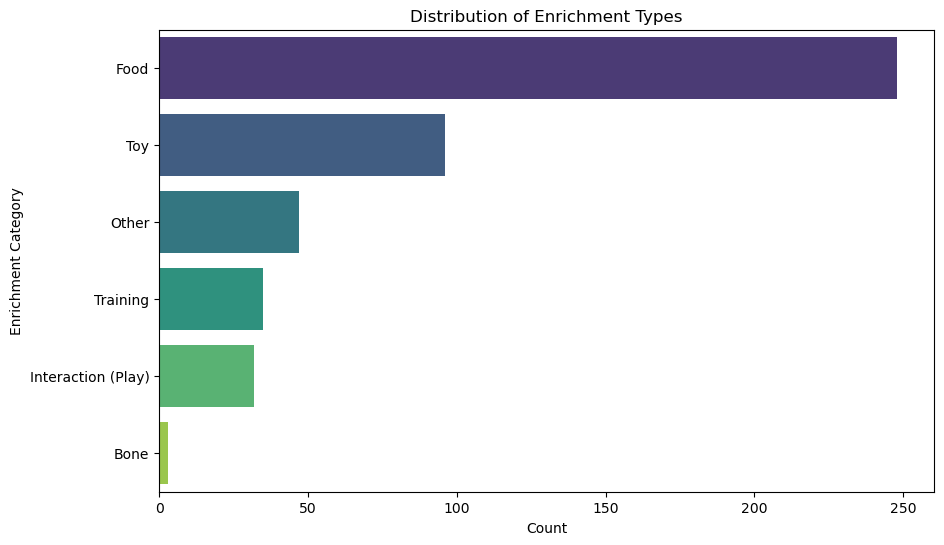

In [120]:
#Enrichment Type Distribution

import matplotlib.pyplot as plt
import seaborn as sns

#Enrichment Type Distribution (Bar Chart)


plt.figure(figsize=(10, 6))
sns.countplot(y=enrichmentLog_update['Category'], order=enrichmentLog_update['Category'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Enrichment Category")
plt.title("Distribution of Enrichment Types")
plt.show()

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\91149343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=enrichmentLog_update['Staff'], order=enrichmentLog_update['Staff'].value_counts().index, palette='coolwarm')


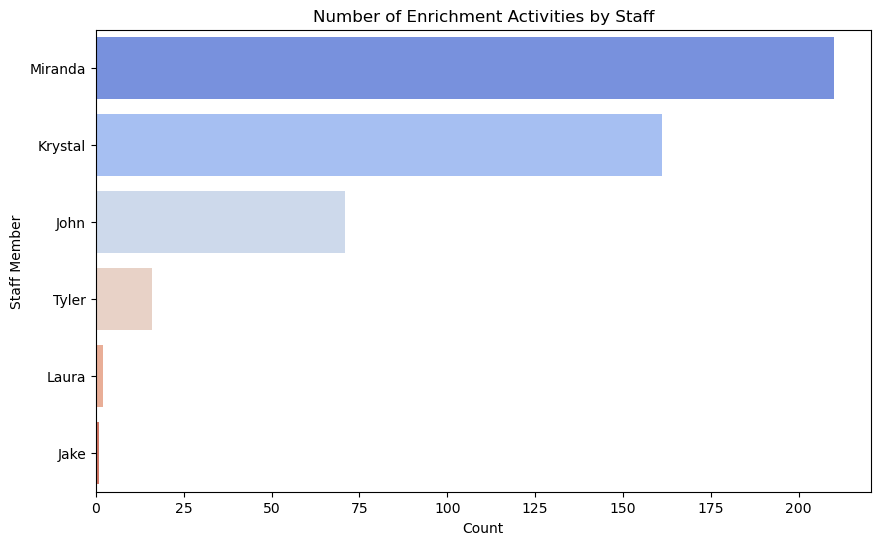

In [124]:
#Staff Participation in Enrichment Activities (Bar Chart)


plt.figure(figsize=(10, 6))
sns.countplot(y=enrichmentLog_update['Staff'], order=enrichmentLog_update['Staff'].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Staff Member")
plt.title("Number of Enrichment Activities by Staff")
plt.show()


C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_63360\836512716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Response", y="Category", data=enrichmentLog_update, palette="Set2")


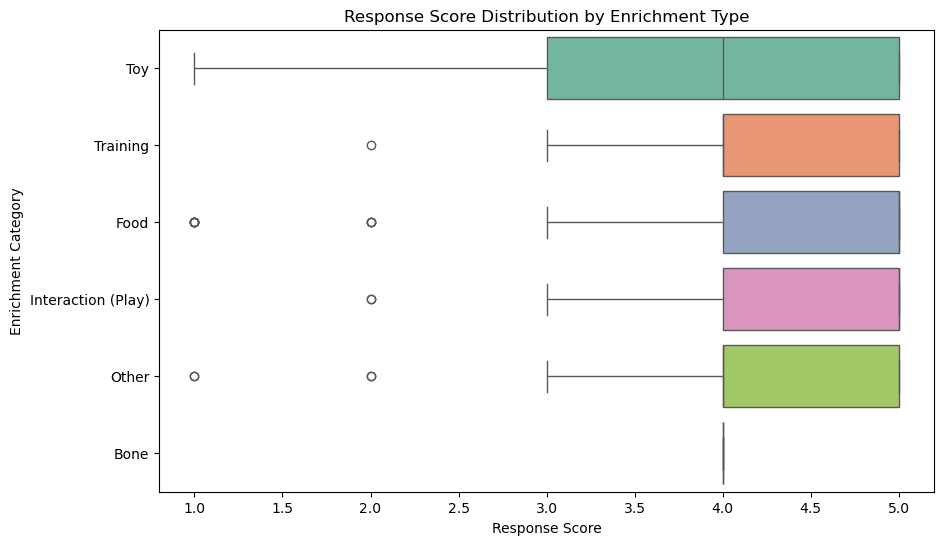

In [126]:
#Response Scores by Enrichment Type (Box Plot)


plt.figure(figsize=(10, 6))
sns.boxplot(x="Response", y="Category", data=enrichmentLog_update, palette="Set2")
plt.xlabel("Response Score")
plt.ylabel("Enrichment Category")
plt.title("Response Score Distribution by Enrichment Type")
plt.show()


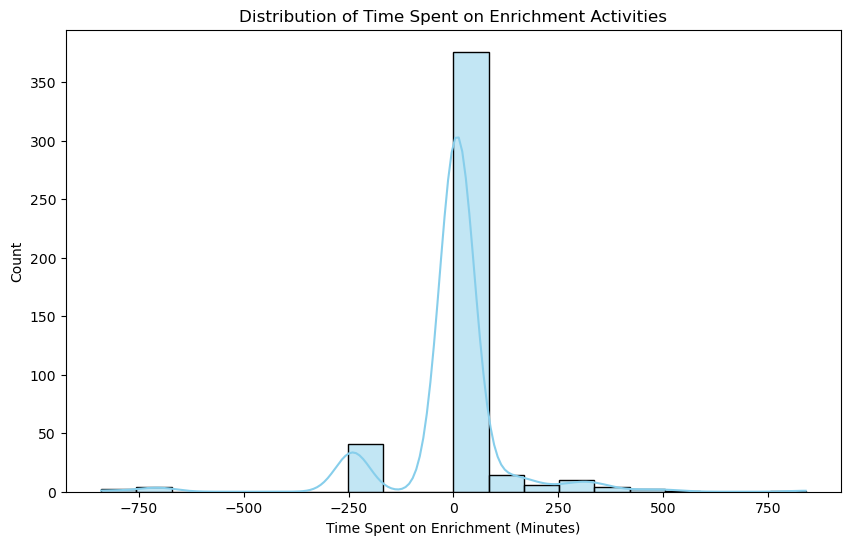

In [128]:
#Time Spent on Enrichment (Histogram)


plt.figure(figsize=(10, 6))
sns.histplot(enrichmentLog_update['Time_Diff'].dropna(), bins=20, kde=True, color='skyblue')
plt.xlabel("Time Spent on Enrichment (Minutes)")
plt.ylabel("Count")
plt.title("Distribution of Time Spent on Enrichment Activities")
plt.show()


#As you can see there are a lot of invalid inputs in the data. This has not been removed to shed light to the input practice.

<Figure size 1200x600 with 0 Axes>

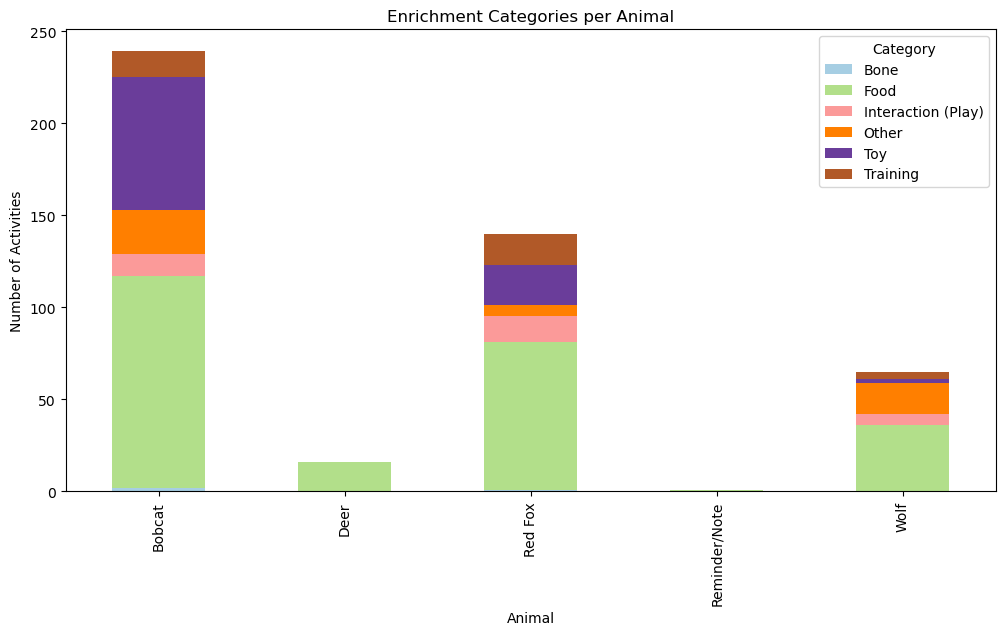

In [130]:
#Enrichment Categories per Animal (Stacked Bar Chart)

plt.figure(figsize=(12, 6))
category_animal = enrichmentLog_update.groupby(['Animal', 'Category']).size().unstack()
category_animal.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Paired")
plt.xlabel("Animal")
plt.ylabel("Number of Activities")
plt.title("Enrichment Categories per Animal")
plt.legend(title="Category")
plt.show()


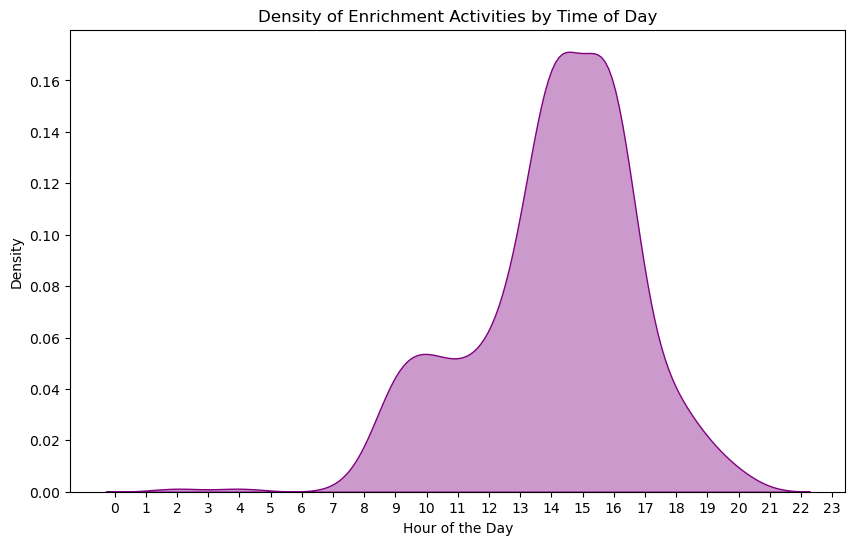

In [132]:
#Activity Trends by Time of Day (Density Plot)


enrichmentLog_update['Hour'] = enrichmentLog_update['Time In'].dt.hour

plt.figure(figsize=(10, 6))
sns.kdeplot(enrichmentLog_update['Hour'], fill=True, color="purple", alpha=0.4)
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.title("Density of Enrichment Activities by Time of Day")
plt.xticks(range(0, 24))
plt.show()
